Connected to .venv-hybrid (Python 3.11.3)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '../data/raw/train.csv'
# Download the data from data/raw/train.csv
df = pd.read_csv(path)

In [ ]:
# Look at value_counts of failure column
# df['failure'].value_counts()

In [ ]:
# Clean the failure column
df['failure'] = df['failure'].str.lower()
df['failure'] = df['failure'].replace({
    'n': 0,
    'no': 0,
    'false': 0,
    False: 0,
    '0': 0,
    'y': 1,
    'yes': 1,
    'true': 1,
    '1': 1,
    True: 1
})
# <ipython-input-20-deb4bb0de4ba>:4: FutureWarning: 
# Downcasting behavior in `replace` is deprecated and will be removed 
# in a future version. To retain the old behavior, explicitly call 
# `result.infer_objects(copy=False)`. To opt-in to the future behavior, 
# set `pd.set_option('future.no_silent_downcasting', True)`

df['failure'] = df['failure'].astype(int)
# The above does not work because there are nan values

# Check dtype of failure column
# df['failure'].dtype

<ipython-input-4-eeb9903477d3>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['failure'] = df['failure'].replace({


In [ ]:
# Convert object columns to appropriate data types

# For each column, convert nulls to np.nan, and convert to float if possible
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].replace({"": np.nan, "nan": np.nan, "NAN": np.nan, "NaN": np.nan, "na": np.nan})
        if df[col].str.isnumeric().all():
            df[col] = df[col].astype(float)
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Separate binned columns from other float columns
binned_columns = []
other_float_columns = []

for col in df.columns:
    # Check if the column name matches the binned column naming convention
    if col[-1].isdigit() and df[col].dtype == 'float64': 
        if col[:-2] not in binned_columns:
            binned_columns.append(col[:-2])
    elif df[col].dtype == 'float64':
        other_float_columns.append(col)

# Output the lists
print("Binned Columns:", binned_columns)
print("Other Float Columns:", other_float_columns)

Binned Columns: ['Crested Butte', 'Anton', 'Aspen', 'Jackson Hole', 'Appalachian', 'Chamonix', 'Whistler']
Other Float Columns: ['Sundown', 'Mission Ridge', 'Jack Frost Big Boulder', 'Santa Fe', 'Snow King', 'Magic', 'Bolton Valley', 'Crotched', 'Blue Knob', 'Hidden Valley', 'Pico', 'Mount Peter', 'Cypress', 'Snow Valley', 'Turner', 'Bear Valley', 'Timberline', 'Big White', 'Silver Star', 'Hemlock Valley', 'Saddleback', 'Lake Louise', 'Grouse', 'Canyons', 'Mad River Glen', 'Snowbasin', 'Mont Saint Anne', 'Taos', 'Whitefish', 'Stevens Pass', 'Snoqualmie Pass', 'Hood Meadows', 'SkiWelt Wilder Kaiser', 'Montecampione', 'Zermatt Matterhorn', 'Chamonix Valley', 'Chamonix Mont Blanc', 'Bear', 'White Pass', 'Teton Village', 'Mount Shasta', 'Snow Summit', 'Timberline Lodge', 'Blue Ridge Area', 'Whitetail', 'Liberty', 'Powder', 'Shawnee', 'Kicking Horse', 'Mount Baker', 'Panorama', 'Silverton', 'Wolf Creek', 'Brighton', 'Copper', 'Snowmass', 'Alta', 'Heavenly', 'Beaver Creek', 'Mount Bachelor',

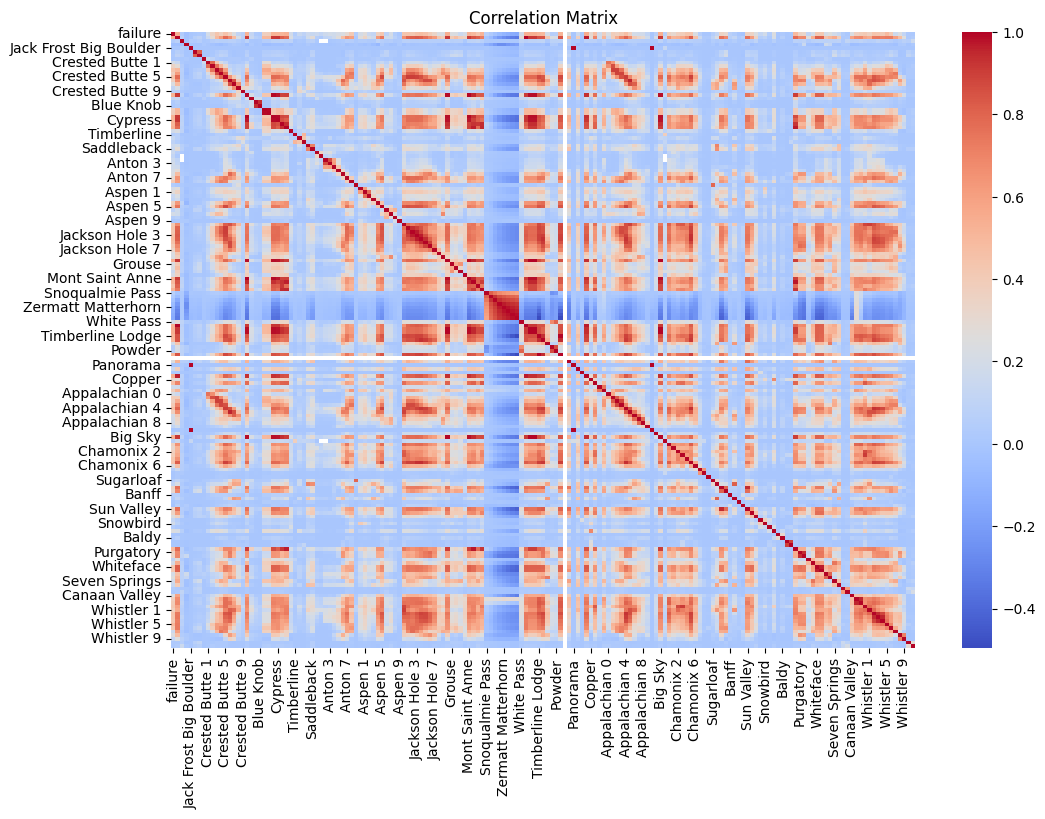

In [ ]:
# Correlation Matrix
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Calculate percentage of failures
total_failures = df['failure'].sum()
total_samples = df.shape[0]
failure_percentage = total_failures / total_samples * 100
print(f'Percentage of Failures: {failure_percentage:.2f}%')

Percentage of Failures: 1.66%


In [ ]:
# Cost of No Inspections
print(f'Cost of No Inspections: ${(total_failures * 750):,}-${(total_failures * 2000):,}')

Cost of No Inspections: $738,750-$1,970,000


In [ ]:
# Cost of Inspecting Every Truck
inspection_cost_min = 100 * total_samples
inspection_cost_max = 300 * total_samples
total_non_failures = total_samples - total_failures
voucher_cost = 250 * total_non_failures
repair_cost = 150 * total_failures
inspect_every_truck_min = inspection_cost_min + repair_cost + voucher_cost
inspect_every_truck_max = inspection_cost_max + repair_cost + voucher_cost
print(f'Cost of Inspecting Every Truck: ${inspect_every_truck_min:,}-${inspect_every_truck_max:,}')

Cost of Inspecting Every Truck: $20,722,300-$32,619,900


In [ ]:
# Cost of Only Inspecting Trucks with a Predicted Failure (Optimal Solution)
inspection_cost_min = 100 * total_failures
inspection_cost_max = 300 * total_failures
repair_cost = 150 * total_failures
perfect_inspection_min = inspection_cost_min + repair_cost
perfect_inspection_max = inspection_cost_max + repair_cost
print(f'Cost of Only Inspecting Trucks with a Predicted Failure: ${perfect_inspection_min:,}-${perfect_inspection_max:,}')

Cost of Only Inspecting Trucks with a Predicted Failure: $246,250-$443,250


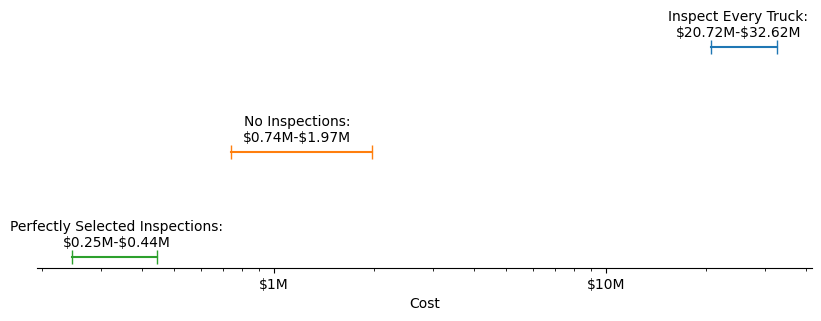

In [ ]:
# Plot the cost of different strategies
strategies = {
    'Inspect Every Truck': {'min': inspect_every_truck_min, 'max': inspect_every_truck_max},
    'No Inspections': {'min':  total_failures * 750, 'max': total_failures * 2000},
    'Perfectly Selected Inspections': {'min': perfect_inspection_min, 'max': perfect_inspection_max}
}
# Initialize the figure
plt.figure(figsize=(10, 3))
# Create the plot
# For each element in strategy, create a box from its minimum to its maximum value
i = 0
x = [25.0, 1.17, 0.335]
y = [-0.1, 0.9, 1.9]
for k, v in strategies.items():
    plt.plot([v['min'] / 1.E+06, v['max'] / 1.E+06], [i, i],  marker='|', markersize=10)
    text = f'{k}:\n\${round(v["min"] / 1.E+06, 2):,}M-\${round(v["max"] / 1.E+06, 2):,}M'
    plt.text(x[i], y[i], text, horizontalalignment='center')
    i += 1
# plt.xticks(range(i), strategies.keys())
# plt.title('Cost of Different Inspection Strategies')
plt.xlabel('Cost')
# Make x axis log
plt.xscale('log')
# Format x tick labels in terms of dollars
plt.gca().xaxis.set_major_formatter('${:,.0f}M'.format)
# Flip y axis
plt.gca().invert_yaxis()
# Hide y tick labels
plt.yticks([])
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

In [ ]:
# Identify variables with high collinearity
y = df['failure']
X = df.drop(columns=['failure'])
threshold = 0.85
high_correlation_pairs = []
corr_matrix = X.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            high_correlation_pairs.append((feature1, feature2, correlation_matrix.iloc[i, j]))

In [ ]:
# Print the pairs of highly correlated features
if high_correlation_pairs:
    print("Highly correlated feature pairs (with correlation coefficient):")
    for feature1, feature2, corr_value in high_correlation_pairs:
        if corr_value > 0.9:
            print(f"{feature1} and {feature2}: {corr_value:.2f}")
else:
    print("No highly correlated features found.")

Highly correlated feature pairs (with correlation coefficient):
Jackson Hole 3 and Jackson Hole 2: 0.94
Jackson Hole 4 and Jackson Hole 2: 0.90
Jackson Hole 4 and Jackson Hole 3: 0.97
Jackson Hole 5 and Jackson Hole 4: 0.97
Jackson Hole 6 and Jackson Hole 5: 0.94
Taos and Cypress: 0.99
Taos and Snow Valley: 0.97
Stevens Pass and Turner: 0.92
Montecampione and SkiWelt Wilder Kaiser: 0.93
Zermatt Matterhorn and Montecampione: 0.94
Chamonix Valley and Montecampione: 0.91
Chamonix Valley and Zermatt Matterhorn: 0.97
Chamonix Mont Blanc and Zermatt Matterhorn: 0.95
Chamonix Mont Blanc and Chamonix Valley: 0.98
Bear and Zermatt Matterhorn: 0.93
Bear and Chamonix Valley: 0.96
Bear and Chamonix Mont Blanc: 0.98
Mount Shasta and Cypress: 0.92
Mount Shasta and Snow Valley: 0.92
Mount Shasta and Taos: 0.91
Snow Summit and Cypress: 0.99
Snow Summit and Snow Valley: 0.98
Snow Summit and Turner: 0.94
Snow Summit and Taos: 0.98
Snow Summit and Whitefish: 0.95
Snow Summit and Mount Shasta: 0.92
Timber

In [ ]:
# Making the list of features to remove
features_to_remove = set()

# Ignoring binned features
for feature1, feature2, corr_value in high_correlation_pairs:
    if corr_value > 0.9 and feature1[-1].isdigit() == False and feature2[-1].isdigit() == False:
        features_to_remove.add(feature2)

In [ ]:
# Drop the features from the DataFrame
df.drop(columns=list(features_to_remove), inplace=True)

In [ ]:
# Verify the remaining features
print("Remaining features after removing highly correlated ones:")
print(df.columns)

Remaining features after removing highly correlated ones:
Index(['failure', 'Breckenridge', 'Sundown', 'Mission Ridge',
       'Jack Frost Big Boulder', 'Santa Fe', 'Snow King', 'Crested Butte 0',
       'Crested Butte 1', 'Crested Butte 2',
       ...
       'Whistler 2', 'Whistler 3', 'Whistler 4', 'Whistler 5', 'Whistler 6',
       'Whistler 7', 'Whistler 8', 'Whistler 9', 'Beech', 'Afriski'],
      dtype='object', length=159)


In [ ]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=3)

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_data.drop(columns='failure'))

# Transform the training and test data
train_data_scaled = scaler.transform(train_data.drop(columns='failure'))
test_data_scaled = scaler.transform(test_data.drop(columns='failure'))

In [ ]:
# Convert the scaled data back to a DataFrame
train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data.drop(columns='failure').columns)
test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data.drop(columns='failure').columns)

In [ ]:
# Run a simple model
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
model = HistGradientBoostingClassifier()

# Fit the model
model.fit(train_data_scaled, train_data['failure'])

# Predict on the test data
predictions = model.predict(test_data_scaled)

# Calculate the accuracy
accuracy = accuracy_score(test_data['failure'], predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [ ]:
# Print confusion matrix
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_data['failure'], predictions)

# Print the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[11665    24]
 [   51   158]]


In [ ]:
# Identify the true positives, false positives, true negatives, and false negatives
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
true_negatives = conf_matrix[0, 0]
false_negatives = conf_matrix[1, 0]

In [ ]:
# Calculate cost of the model
inspection_cost_min = 100 * (true_positives + false_positives)
inspection_cost_max = 300 * (true_positives + false_positives)
voucher_cost = 250 * false_positives
repair_cost = 150 * true_positives
failed_repair_cost_min = 750 * false_negatives
failed_repair_cost_max = 2000 * false_negatives
total_cost_min = inspection_cost_min + voucher_cost + repair_cost + failed_repair_cost_min
total_cost_max = inspection_cost_max + voucher_cost + repair_cost + failed_repair_cost_max
print(f'Cost of the model: ${total_cost_min:,}-${total_cost_max:,}')

Cost of the model: $86,150-$186,300


In [ ]:
# Cost per truck
total_trucks = test_data.shape[0]
cost_per_truck_min = total_cost_min / total_trucks
cost_per_truck_max = total_cost_max / total_trucks
print(f'Cost per truck: ${cost_per_truck_min:.2f}-${cost_per_truck_max:.2f}')

Cost per truck: $7.24-$15.66


In [ ]:
# Calculate precision, specificity, recall
# We want to focus on recall
precision = true_positives / (true_positives + false_positives)
specificity = true_negatives / (true_negatives + false_positives)
recall = true_positives / (true_positives + false_negatives)
print(f'Precision: {precision:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Recall: {recall:.2f}')

Precision: 0.87
Specificity: 1.00
Recall: 0.76


In [ ]:
# Calculate precision, specificity, recall
# We want to focus on recall
precision = true_positives / (true_positives + false_positives)
specificity = true_negatives / (true_negatives + false_positives)
recall = true_positives / (true_positives + false_negatives)
print(f'Precision: {precision:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'Recall: {recall:.4f}')

Precision: 0.8681
Specificity: 0.9979
Recall: 0.7560
